In [1]:
# KNN classifier applied to 2d dataset with 3 classes

import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_blobs,load_iris
from sklearn.model_selection import train_test_split
import pandas as pd



#KNN (K Nearest Neighbours)

Data Generation

In [2]:
X, y = make_blobs(n_samples=300, centers=3, n_features=2, cluster_std=6, random_state=42)
ntrain = 100

#first 100 dataset assigned as training data
x_train = X[:ntrain] #for input
y_train = y[:ntrain] #for output

# 101 onwards rest of the set is test set
x_test = X[ntrain:] #for input
y_test = y[ntrain:] #for output


In [3]:
print(x_train[0,1])
x_train

-11.979175810064698


array([[ -9.63579259, -11.97917581],
       [-12.04210738,  -9.18744286],
       [  2.42607185,   1.68922423],
       [  3.33379162,   8.5658308 ],
       [-19.1083744 , -12.92862746],
       [  9.78583658,   1.0135385 ],
       [ -1.47011207,  11.32619041],
       [  7.11746756,  -1.40917763],
       [ -5.38424305,   7.90033227],
       [ -9.65701861,  12.95360778],
       [ -6.1194373 ,  20.12795524],
       [  6.78197175,  -2.18428789],
       [ -1.25601605,  -2.74373462],
       [-11.00142208,   6.49041419],
       [-10.78348261,  -9.8028619 ],
       [ -6.72151619,   7.04831325],
       [-16.64488182,  -6.59159991],
       [ -7.51097668,   3.09189557],
       [ -1.92673233,  14.82615607],
       [  1.01194494,  22.15701988],
       [  4.44237585,   4.09019222],
       [ -3.47691189,  11.43859127],
       [ 10.49059724,   1.09082539],
       [ -7.55359549,  -8.20592719],
       [ -5.28970378,   6.21990761],
       [ -3.70080212,   1.76930213],
       [-10.34025517,  -2.34776224],
 

Visualization Train Data Cluster

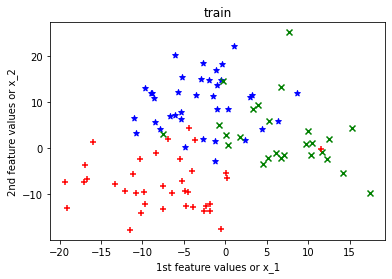

In [4]:
plt.figure()
y_unique = np.unique(y_train) # Returns the sorted unique elements of the array y_train (Since we've kept centres=3, in our case y_unique = [0, 1, 2])
markers = '*x+'
colors = 'bgr'
for i in range(len(y_unique)): #for i in 0,1 and 2
  plt.scatter(x_train[y_train == y_unique[i], 0],  
             x_train[y_train == y_unique[i], 1],
             marker=markers[i],
             c=colors[i]) # x=x_train[y_train == y_unique[i], 0], y=x_train[y_train == y_unique[i], 1] ==> x axis is feature 0 and y axis is feature 1
plt.title('train')
plt.xlabel('1st feature values or x_1')
plt.ylabel('2nd feature values or x_2')

plt.show()

In [5]:
# Checking and understanding x_train[y_train == y_unique[i], 0]
x_train[y_train == y_unique[0], 0]

array([  2.42607185,  -1.47011207,  -5.38424305,  -9.65701861,
        -6.1194373 ,  -1.25601605, -11.00142208,  -6.72151619,
        -1.92673233,   1.01194494,   4.44237585,  -3.47691189,
        -5.28970378,  -7.8462842 ,  -8.45241557,  -8.93455261,
        -1.22463516,  -1.14443802,  -0.96389528,  -2.71746824,
        -0.34082399,   6.35816665,   3.27105915,  -5.27303025,
        -8.88301991,   0.33022812,  -4.86184654,  -6.11302976,
        -8.58618435,  -2.94125835,  -0.52161703,   8.68544944,
       -10.77521383,  -2.72415386,   2.98321508,  -5.68775885,
        -0.94990086])

In [6]:
# Checking and understanding x_train[y_train == y_unique[i], 0]
y_train

array([2, 2, 0, 1, 2, 1, 0, 1, 0, 0, 0, 1, 0, 0, 2, 0, 2, 1, 0, 0, 0, 0,
       1, 2, 0, 2, 2, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 1, 2, 1, 1, 0, 2, 1,
       0, 0, 2, 1, 2, 1, 1, 2, 2, 0, 2, 1, 2, 0, 1, 0, 2, 1, 1, 2, 2, 1,
       1, 2, 2, 0, 1, 2, 2, 0, 0, 2, 2, 1, 0, 1, 0, 0, 2, 0, 1, 2, 2, 0,
       1, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 2])

In [7]:
# Checking and understanding x_train[y_train == y_unique[i], 0]
x_train

array([[ -9.63579259, -11.97917581],
       [-12.04210738,  -9.18744286],
       [  2.42607185,   1.68922423],
       [  3.33379162,   8.5658308 ],
       [-19.1083744 , -12.92862746],
       [  9.78583658,   1.0135385 ],
       [ -1.47011207,  11.32619041],
       [  7.11746756,  -1.40917763],
       [ -5.38424305,   7.90033227],
       [ -9.65701861,  12.95360778],
       [ -6.1194373 ,  20.12795524],
       [  6.78197175,  -2.18428789],
       [ -1.25601605,  -2.74373462],
       [-11.00142208,   6.49041419],
       [-10.78348261,  -9.8028619 ],
       [ -6.72151619,   7.04831325],
       [-16.64488182,  -6.59159991],
       [ -7.51097668,   3.09189557],
       [ -1.92673233,  14.82615607],
       [  1.01194494,  22.15701988],
       [  4.44237585,   4.09019222],
       [ -3.47691189,  11.43859127],
       [ 10.49059724,   1.09082539],
       [ -7.55359549,  -8.20592719],
       [ -5.28970378,   6.21990761],
       [ -3.70080212,   1.76930213],
       [-10.34025517,  -2.34776224],
 

KNN Model with Cluster boundaries

C:\Users\VISHWA~1\AppData\Local\Temp/ipykernel_11096/2613434572.py:14: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, y_predicted.reshape(100, 100), cmap='jet', alpha=0.2)


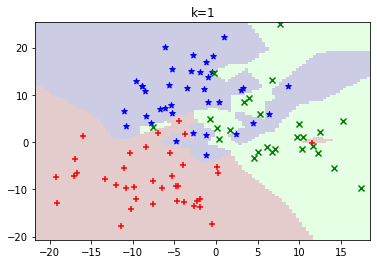

C:\Users\VISHWA~1\AppData\Local\Temp/ipykernel_11096/2613434572.py:14: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, y_predicted.reshape(100, 100), cmap='jet', alpha=0.2)


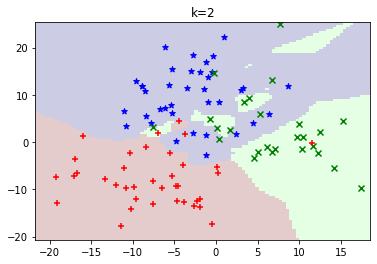

C:\Users\VISHWA~1\AppData\Local\Temp/ipykernel_11096/2613434572.py:14: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, y_predicted.reshape(100, 100), cmap='jet', alpha=0.2)


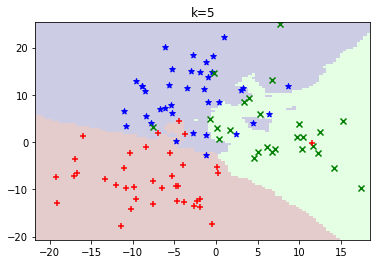

In [8]:
x = np.linspace(np.min(x_test[:, 0]), np.max(x_test[:, 0]), 100)
y = np.linspace(np.min(x_test[:, 1]), np.max(x_test[:, 1]), 100)
xx, yy = np.meshgrid(x, y) # Return coordinate matrices from coordinate vectors.
xy = np.c_[xx.ravel(), yy.ravel()]


# use the knn model to predict
for k in [1, 2, 5]:
  knn = KNN(n_neighbors=k)
  knn.fit(x_train, y_train)
  plt.figure()
  y_predicted = knn.predict(xy)
  
  plt.pcolormesh(xx, yy, y_predicted.reshape(100, 100), cmap='jet', alpha=0.2)

  for i in range(len(y_unique)):
      plt.scatter(x_train[y_train == y_unique[i], 0],
                 x_train[y_train == y_unique[i], 1],
                 marker=markers[i],
                 c=colors[i])
  plt.title('k=%s' % (k))

  plt.show()

In [9]:
xx

array([[-21.70949419, -21.30305657, -20.89661895, ...,  17.714955  ,
         18.12139262,  18.52783024],
       [-21.70949419, -21.30305657, -20.89661895, ...,  17.714955  ,
         18.12139262,  18.52783024],
       [-21.70949419, -21.30305657, -20.89661895, ...,  17.714955  ,
         18.12139262,  18.52783024],
       ...,
       [-21.70949419, -21.30305657, -20.89661895, ...,  17.714955  ,
         18.12139262,  18.52783024],
       [-21.70949419, -21.30305657, -20.89661895, ...,  17.714955  ,
         18.12139262,  18.52783024],
       [-21.70949419, -21.30305657, -20.89661895, ...,  17.714955  ,
         18.12139262,  18.52783024]])

In [10]:
x

array([-21.70949419, -21.30305657, -20.89661895, -20.49018133,
       -20.08374371, -19.67730609, -19.27086847, -18.86443085,
       -18.45799323, -18.05155561, -17.64511799, -17.23868037,
       -16.83224275, -16.42580513, -16.01936751, -15.61292988,
       -15.20649226, -14.80005464, -14.39361702, -13.9871794 ,
       -13.58074178, -13.17430416, -12.76786654, -12.36142892,
       -11.9549913 , -11.54855368, -11.14211606, -10.73567844,
       -10.32924082,  -9.9228032 ,  -9.51636558,  -9.10992796,
        -8.70349034,  -8.29705272,  -7.8906151 ,  -7.48417747,
        -7.07773985,  -6.67130223,  -6.26486461,  -5.85842699,
        -5.45198937,  -5.04555175,  -4.63911413,  -4.23267651,
        -3.82623889,  -3.41980127,  -3.01336365,  -2.60692603,
        -2.20048841,  -1.79405079,  -1.38761317,  -0.98117555,
        -0.57473793,  -0.16830031,   0.23813731,   0.64457493,
         1.05101256,   1.45745018,   1.8638878 ,   2.27032542,
         2.67676304,   3.08320066,   3.48963828,   3.89

Model Selection

In [11]:
y

array([-20.69163658, -20.22671802, -19.76179946, -19.29688089,
       -18.83196233, -18.36704377, -17.90212521, -17.43720664,
       -16.97228808, -16.50736952, -16.04245095, -15.57753239,
       -15.11261383, -14.64769527, -14.1827767 , -13.71785814,
       -13.25293958, -12.78802102, -12.32310245, -11.85818389,
       -11.39326533, -10.92834676, -10.4634282 ,  -9.99850964,
        -9.53359108,  -9.06867251,  -8.60375395,  -8.13883539,
        -7.67391683,  -7.20899826,  -6.7440797 ,  -6.27916114,
        -5.81424257,  -5.34932401,  -4.88440545,  -4.41948689,
        -3.95456832,  -3.48964976,  -3.0247312 ,  -2.55981264,
        -2.09489407,  -1.62997551,  -1.16505695,  -0.70013838,
        -0.23521982,   0.22969874,   0.6946173 ,   1.15953587,
         1.62445443,   2.08937299,   2.55429155,   3.01921012,
         3.48412868,   3.94904724,   4.41396581,   4.87888437,
         5.34380293,   5.80872149,   6.27364006,   6.73855862,
         7.20347718,   7.66839574,   8.13331431,   8.59

In [12]:
yy

array([[-20.69163658, -20.69163658, -20.69163658, ..., -20.69163658,
        -20.69163658, -20.69163658],
       [-20.22671802, -20.22671802, -20.22671802, ..., -20.22671802,
        -20.22671802, -20.22671802],
       [-19.76179946, -19.76179946, -19.76179946, ..., -19.76179946,
        -19.76179946, -19.76179946],
       ...,
       [ 24.405464  ,  24.405464  ,  24.405464  , ...,  24.405464  ,
         24.405464  ,  24.405464  ],
       [ 24.87038257,  24.87038257,  24.87038257, ...,  24.87038257,
         24.87038257,  24.87038257],
       [ 25.33530113,  25.33530113,  25.33530113, ...,  25.33530113,
         25.33530113,  25.33530113]])

In [13]:
xy

array([[-21.70949419, -20.69163658],
       [-21.30305657, -20.69163658],
       [-20.89661895, -20.69163658],
       ...,
       [ 17.714955  ,  25.33530113],
       [ 18.12139262,  25.33530113],
       [ 18.52783024,  25.33530113]])

In [14]:
xy.shape

(10000, 2)

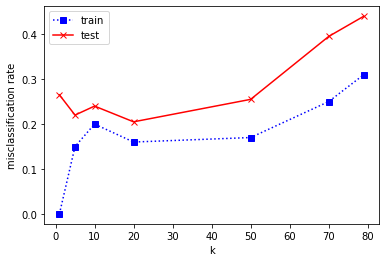

In [15]:
ks = [1, 5, 10, 20, 50, 70, 79]
train_errs = []
test_errs = []
for k in ks:
  knn = KNN(n_neighbors=k)
  knn.fit(x_train, y_train)
  train_errs.append(1 - knn.score(x_train, y_train))
  test_errs.append(1 - knn.score(x_test, y_test))
plt.figure()
plt.plot(ks, train_errs, 'bs:', label='train')
plt.plot(ks, test_errs, 'rx-', label='test')
plt.legend()
plt.xlabel('k')
plt.ylabel('misclassification rate')

plt.show()

#KNN on IRIS Dataset

##Data Pre-processing

In [16]:
iris = load_iris() # Load IRIS dataset from sckitlearn library

In [17]:
print(iris.feature_names)  # Iris has 4 feature and 3 output classes
print(iris.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [18]:
X = iris.data
print(X[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [19]:
print(X.shape)

(150, 4)


In [20]:
y = iris.target
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Split Dataset into train and test

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [22]:
print(X_train.shape)
print(X_train[:5])

(100, 4)
[[5.7 2.9 4.2 1.3]
 [7.6 3.  6.6 2.1]
 [5.6 3.  4.5 1.5]
 [5.1 3.5 1.4 0.2]
 [7.7 2.8 6.7 2. ]]


In [23]:
print(y_train)

[1 2 1 0 2 1 0 0 0 1 2 0 0 0 1 0 1 2 0 1 2 0 2 2 1 1 2 1 0 1 2 0 0 1 1 0 2
 0 0 1 1 2 1 2 2 1 0 0 2 2 0 0 0 1 2 0 2 2 0 1 1 2 1 2 0 2 1 2 1 1 1 0 1 1
 0 1 2 2 0 1 2 2 0 2 0 1 2 2 1 2 1 1 2 2 0 1 2 0 1 2]


Visualize Iris dataset based on petal length and petal width

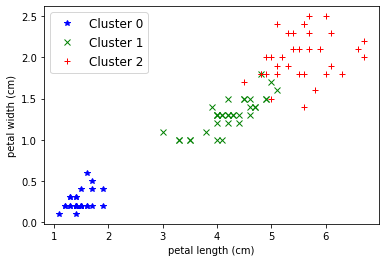

In [24]:
K=3
colors = 'bgr'
markers = '*x+'
fig, ax = plt.subplots()
for k in range(0, K):
  ax.plot(X_train[y_train==k, 2], X_train[y_train==k, 3], color=colors[k], \
          marker=markers[k], linestyle = 'None', label="Cluster {}".format(k))
  
ax.set(xlabel = iris.feature_names[2])
ax.set(ylabel = iris.feature_names[3])
plt.legend(loc="upper left", fontsize=12)
# save_fig("iris-2d-gmm")
plt.show()

##KNN Model

In [25]:
knn = KNN(n_neighbors=2)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [26]:
y_pred=knn.predict(X_test)
print(knn.score(X_train, y_train))
print(knn.score(X_test, y_test))

0.97
0.98


## Extended Learning Question (My Attepmt):

##Model Selection for Iris Dataset (My attempt)

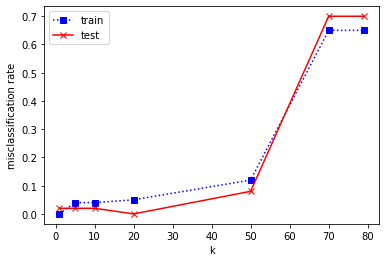

In [31]:
# Hint: Plot misclassification rate vs k and observe
ks = [1, 5, 10, 20, 50, 70, 79]
train_errs = []
test_errs = []
for k in ks:
  knn = KNN(n_neighbors=k)
  knn.fit(X_train, y_train)
  train_errs.append(1 - knn.score(X_train, y_train))
  test_errs.append(1 - knn.score(X_test, y_test))
plt.figure()
plt.plot(ks, train_errs, 'bs:', label='train')
plt.plot(ks, test_errs, 'rx-', label='test')
plt.legend()
plt.xlabel('k')
plt.ylabel('misclassification rate')

plt.show()

## The value of k should be somewhere between 5 to 10. As very small value of k will cause overfiffing (because of zero or near to zero training error) and at very large value the decision boundaries become smoother (since we are averaging over larger neighborhoods), so the training error increases, its underfit. And in the range between 5 to 10 the difference between test and train error is less. Therefore, a good value to choose for K is K=5

##KNN From Scratch (MY ATTEMPT)

In [32]:
def get_nearest_nei(X_train,X_test):
    #input: X_train, X_test
    iris = load_iris()
    X = iris.data
    y = iris.target

    # Generating Training Dataset
    xtrn = (X[:25], X[50:75], X[100:125])
    X_train = np.concatenate(xtrn) #Training input

    ytrn = (y[:25], y[50:75], y[100:125])
    y_train = np.concatenate(ytrn)

    # Generating Test Data
    xtst = (X[25:50], X[75:100], X[125:150])
    X_test = np.concatenate(xtst) #Testing input

    ytst = (y[25:50], y[75:100], y[125:150])
    y_test = np.concatenate(ytst)


    #Use Euclidian Distance Method
    test_size = X_test.shape[0]
    train_size = X_train.shape[0]  #X_train.shape[0] is equivalent to len(X_train) -- Both Return the first dimension of the array

    dist = np.zeros((test_size, train_size))
    for i in range(test_size):
      for j in range(train_size):
        dist [i, j] = np.sqrt(np.sum((X_test[i, :] - X_train[j, :]) **2))

    #output: Distance Matrix: Distance of every point in X_test to every data point in X_train
    return dist

In [33]:
def KNN_scratch(k, X_train, y_train, X_test):
    # input: k: k nearest neighbours,
    # X_train and y_train: Training samples
    # X_test: points to be predicted

    #Step 1 : Get Distance Matrix
    dis_matrix = get_nearest_nei(X_train,X_test) # suppose n data samples then dis_matrix = (n,n)

    #Step 2: Find k Nearest Neighbours and their labels
    dis_matrix_size = dis_matrix.shape[0]
    y_pred = np.zeros(dis_matrix_size)
    for i in range(dis_matrix_size):

      nearest_y = []
      k_nearest_neighbours = np.argsort(dis_matrix[i, :])[:k]
      nearest_y = y_train[k_nearest_neighbours]
      
      #Step 3: Find count of similiar labels from nearest neighbours
      #Step 4: Assign max count labels as output to the point
      y_pred[i] = np.argmax(np.bincount(nearest_y))  

    return y_pred

In [30]:
def score(k, X_train, y_train, X_test, X_test, y_test):
    
    y_pred = KNN_scratch(k, X_train, y_train, X_test)
    
    return float(sum(y_pred - y_test))/ float(len(y_test))

SyntaxError: duplicate argument 'X_test' in function definition (Temp/ipykernel_11096/2469069993.py, line 1)

## Extended Learning Question (Solution):

KNN From Scratch

In [204]:
#Importing the required modules

from numpy.random import randint
 
#Loading the Data
iris= load_iris()
 
# Store features matrix in X
X= iris.data
#Store target vector in 
y= iris.target
 
 
# Creating the training Data
train_idx = xxx = randint(0,150,100) # random.randint(low, high=None, size=None, dtype=int): Return random integers from low (inclusive) to high (exclusive)
X_train = X[train_idx]
y_train = y[train_idx]
 
#Creating the testing Data
test_idx = xxx = randint(0,150,50) #taking 50 random samples
X_test = X[test_idx]
y_test = y[test_idx]

In [205]:
X_train.shape

(100, 4)

In [206]:
print(len(X_train))
print(X_train)

100
[[6.1 2.6 5.6 1.4]
 [4.6 3.4 1.4 0.3]
 [6.6 2.9 4.6 1.3]
 [7.6 3.  6.6 2.1]
 [6.7 2.5 5.8 1.8]
 [6.  2.2 4.  1. ]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [6.7 3.3 5.7 2.5]
 [6.4 3.2 5.3 2.3]
 [5.8 2.8 5.1 2.4]
 [5.1 3.8 1.9 0.4]
 [6.4 2.9 4.3 1.3]
 [6.3 3.3 6.  2.5]
 [5.5 2.4 3.7 1. ]
 [5.8 4.  1.2 0.2]
 [6.  3.  4.8 1.8]
 [5.  3.5 1.3 0.3]
 [5.5 2.4 3.8 1.1]
 [4.9 3.1 1.5 0.2]
 [5.7 2.6 3.5 1. ]
 [5.6 2.7 4.2 1.3]
 [5.5 4.2 1.4 0.2]
 [6.5 2.8 4.6 1.5]
 [5.  2.3 3.3 1. ]
 [5.6 3.  4.1 1.3]
 [5.1 3.5 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [6.8 3.  5.5 2.1]
 [5.7 2.8 4.5 1.3]
 [6.2 3.4 5.4 2.3]
 [5.8 2.6 4.  1.2]
 [5.  3.5 1.3 0.3]
 [6.4 2.9 4.3 1.3]
 [6.9 3.1 4.9 1.5]
 [6.3 3.4 5.6 2.4]
 [6.4 3.2 4.5 1.5]
 [5.  3.4 1.6 0.4]
 [4.4 3.  1.3 0.2]
 [6.  3.4 4.5 1.6]
 [5.6 2.5 3.9 1.1]
 [6.9 3.1 5.4 2.1]
 [6.  3.4 4.5 1.6]
 [5.  2.  3.5 1. ]
 [4.9 3.6 1.4 0.1]
 [5.4 3.4 1.7 0.2]
 [5.6 3.  4.1 1.3]
 [6.9 3.2 5.7 2.3]
 [6.4 2.7 5.3 1.9]
 [5.6 2.7 4.2 1.3]
 [6.2 2.8 4.8 1.8]
 [5.8 2.6 4.  1.2]
 [5.5 3.

In [207]:
X_test.shape

(50, 4)

In [208]:
X_test

array([[5.4, 3.4, 1.5, 0.4],
       [5.6, 2.7, 4.2, 1.3],
       [4.8, 3. , 1.4, 0.1],
       [6.1, 3. , 4.9, 1.8],
       [6.7, 3.1, 4.7, 1.5],
       [6.3, 2.3, 4.4, 1.3],
       [5.9, 3. , 4.2, 1.5],
       [6. , 3.4, 4.5, 1.6],
       [5.6, 3. , 4.1, 1.3],
       [6. , 2.9, 4.5, 1.5],
       [5.7, 2.9, 4.2, 1.3],
       [6.3, 2.9, 5.6, 1.8],
       [5.3, 3.7, 1.5, 0.2],
       [4.6, 3.4, 1.4, 0.3],
       [7.6, 3. , 6.6, 2.1],
       [5.5, 2.4, 3.8, 1.1],
       [5.4, 3.9, 1.7, 0.4],
       [6.3, 2.9, 5.6, 1.8],
       [5.9, 3.2, 4.8, 1.8],
       [5.1, 3.5, 1.4, 0.2],
       [7.4, 2.8, 6.1, 1.9],
       [4.9, 3.1, 1.5, 0.1],
       [6.1, 3. , 4.9, 1.8],
       [6.5, 3. , 5.8, 2.2],
       [5.8, 4. , 1.2, 0.2],
       [5.8, 2.7, 5.1, 1.9],
       [5.3, 3.7, 1.5, 0.2],
       [6.1, 3. , 4.6, 1.4],
       [5.5, 2.3, 4. , 1.3],
       [5. , 3. , 1.6, 0.2],
       [6.3, 2.5, 5. , 1.9],
       [4.4, 2.9, 1.4, 0.2],
       [5.7, 3. , 4.2, 1.2],
       [6.2, 3.4, 5.4, 2.3],
       [4.6, 3

In [209]:
X_train[0]

array([6.1, 2.6, 5.6, 1.4])

In [210]:
X_test[1]

array([5.6, 2.7, 4.2, 1.3])

In [211]:
def eucledian(p1,p2):
    dist = np.sqrt(np.sum((p1-p2)**2))
    return dist

In [212]:
dis_matrix = np.zeros([len(X_train),len(X_test)])  # (100x50) zero matrix
dis_matrix.shape
print(dis_matrix)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [213]:
def get_nearest_nei(X_train,X_test):
    #input: X_train, X_test
    dis_matrix = np.zeros([len(X_train),len(X_test)])  # (100x50) zero matrix
    
    #Use Euclidian Distance Method
    
    for i in range(len(X_train)):  #len(X_train) (100 here) is equivalent to X_train.shape[0] -- Both Return the first dimension of the array
        
        for j in range(len(X_test)): # (X_test= 50 here)
            
            dis_matrix[i][j] = eucledian(X_train[i],X_test[j])    

    return dis_matrix
    #output: Distance Matrix: Distance of every point in X_test to every data point in X_train

In [214]:
dist_mat = get_nearest_nei(X_train,X_test)

print(dist_mat.shape)
print(dist_mat)

(100, 50)
[[4.35201103 1.49331845 4.6021734  ... 1.19163753 4.65510472 4.44634682]
 [0.81240384 3.21403174 0.48989795 ... 3.48998567 0.9539392  0.3       ]
 [3.47994253 1.09544512 3.86393582 ... 0.91104336 3.76031914 3.7013511 ]
 ...
 [3.91663121 1.161895   4.23556372 ... 0.87177979 4.20356991 4.06816912]
 [2.9        0.73484692 3.10644491 ... 0.88881944 3.3015148  3.04630924]
 [2.54558441 1.19582607 2.5019992  ... 1.48996644 2.99499583 2.5       ]]


In [215]:
dist = np.argsort(dist_mat[:,0])[:5]
dist

array([60, 45, 52, 57, 26], dtype=int64)

In [216]:
labels = y_train[dist]
labels

array([0, 0, 0, 0, 0])

In [217]:
lab = mode(labels)
lab

ModeResult(mode=array([0]), count=array([5]))

In [218]:
dist_mat[96][0]

0.984885780179611

In [219]:
from scipy.stats import mode
def KNN_scratch(k,X_train,y_train,X_test):
    # input: k: k nearest neighbours,
    # X_train and y_train: Training samples
    # X_test: points to be predicted

    y_pred = []

    #Step 1 : Get Distance Matrix
    dis_matrix = get_nearest_nei(X_train,X_test)

    #Step 2: Find k Nearest Neighbours and their labels
    for i in range(len(X_test)):  ## (X_test= 50 here)
        
        #Step 3: Find count of similiar labels from nearest neighbours
        dist = np.argsort(dis_matrix[:,i])[:k] #For a particular test data, this gives 5 nearest train points
        labels = y_train[dist]
              
        #Step 4: Assign max count labels as output to the point    
        lab = mode(labels) 
        lab = lab.mode[0]
        y_pred.append(lab)

    # output: y_pred : cluster id for X_test
    return y_pred

In [220]:
y_pred = KNN_scratch(5,X_train,y_train,X_test)

In [221]:
y_pred

[0,
 1,
 0,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 0,
 0,
 2,
 1,
 0,
 2,
 1,
 0,
 2,
 0,
 2,
 2,
 0,
 2,
 0,
 1,
 1,
 0,
 2,
 0,
 1,
 2,
 0,
 0,
 2,
 2,
 1,
 1,
 1,
 0,
 2,
 2,
 2,
 2,
 0,
 1,
 0,
 0]

Model Selection

In [222]:
def accuracy(y_true,y_pred):
    acc = np.sum(np.equal(y_true, y_pred)) / len(y_true)
    return acc

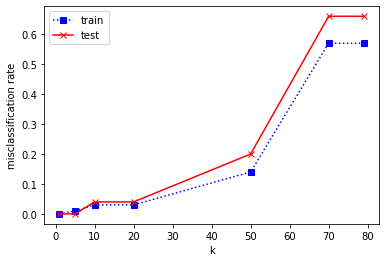

In [223]:
ks = [1, 5, 10, 20, 50, 70, 79]
train_errs = []
test_errs = []
for k in ks:
  y_train_pred = KNN_scratch(k,X_train,y_train,X_train)
  y_pred = KNN_scratch(k,X_train,y_train,X_test)
  train_errs.append(1 - accuracy(y_train, y_train_pred))
  test_errs.append(1 - accuracy(y_test, y_pred))
plt.figure()
plt.plot(ks, train_errs, 'bs:', label='train')
plt.plot(ks, test_errs, 'rx-', label='test')
plt.legend()
plt.xlabel('k')
plt.ylabel('misclassification rate')

plt.show()